In [1]:
%load_ext autoreload
%autoreload 2

import time
import sys
import importlib
import editdistance
import numpy as np
from prondict import *
from lab3_proto import *
from lab3_tools import *
from lab1_proto import *
from lab1_tools import *
from lab2_proto import *
from lab2_tools import *
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 4)
np.set_printoptions(precision=3)

Using TensorFlow backend.
/home/dominik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dominik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dominik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dominik/.local/lib/python3.6/site-packages/tensorflow/py

# Target Class Definition

In [2]:
#phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
phoneHMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]
stateList.sort()
print(stateList)


['ah_0', 'ah_1', 'ah_2', 'ao_0', 'ao_1', 'ao_2', 'ay_0', 'ay_1', 'ay_2', 'eh_0', 'eh_1', 'eh_2', 'ey_0', 'ey_1', 'ey_2', 'f_0', 'f_1', 'f_2', 'ih_0', 'ih_1', 'ih_2', 'iy_0', 'iy_1', 'iy_2', 'k_0', 'k_1', 'k_2', 'n_0', 'n_1', 'n_2', 'ow_0', 'ow_1', 'ow_2', 'r_0', 'r_1', 'r_2', 's_0', 's_1', 's_2', 'sil_0', 'sil_1', 'sil_2', 'sp_0', 't_0', 't_1', 't_2', 'th_0', 'th_1', 'th_2', 'uw_0', 'uw_1', 'uw_2', 'v_0', 'v_1', 'v_2', 'w_0', 'w_1', 'w_2', 'z_0', 'z_1', 'z_2']


# load all the data

In [3]:
example = np.load('lab3_example.npz', allow_pickle=True)['example'].item()
example.keys()

dict_keys(['filename', 'samples', 'gender', 'speaker', 'digits', 'repetition', 'lmfcc', 'wordTrans', 'phoneTrans', 'utteranceHMM', 'stateTrans', 'obsloglik', 'viterbiLoglik', 'viterbiPath', 'viterbiStateTrans'])

## create the word transcription

True
['sil', 'z', 'iy', 'r', 'ow', 'sp', 'f', 'ao', 'r', 'sp', 'th', 'r', 'iy', 'sp', 'sil']

 HMM concat
dict_keys(['startprob', 'transmat', 'means', 'covars'])
startprob  is allclose?: True
transmat  is allclose?: True
means  is allclose?: True
covars  is allclose?: True

stateTrans
True
['sil_0', 'sil_1', 'sil_2', 'z_0', 'z_1', 'z_2', 'iy_0', 'iy_1', 'iy_2', 'r_0', 'r_1', 'r_2', 'ow_0', 'ow_1', 'ow_2', 'sp_0', 'f_0', 'f_1', 'f_2', 'ao_0', 'ao_1', 'ao_2', 'r_0', 'r_1', 'r_2', 'sp_0', 'th_0', 'th_1', 'th_2', 'r_0', 'r_1', 'r_2', 'iy_0', 'iy_1', 'iy_2', 'sp_0', 'sil_0', 'sil_1', 'sil_2']

stateList
obsloglik allclose?  True


/home/dominik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/home/dominik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


38


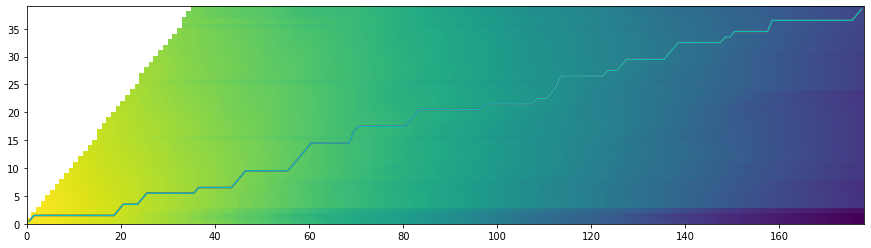

viterbi loglik equal? True
[39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 58, 58, 58, 58, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 21, 21, 21, 21, 21, 21, 21, 21, 22, 23, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 35, 30, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 33, 33, 33, 34, 35, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 48, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 35, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 41]
path equal to example? False
generate path file


'0 0.01 sil_0\n0.01 0.19000000000000003 sil_1\n0.19000000000000003 0.20000000000000004 sil_2\n0.20000000000000004 0.24000000000000007 z_0\n0.24000000000000007 0.25000000000000006 z_1\n0.25000000000000006 0.36000000000000015 z_2\n0.36000000000000015 0.4400000000000002 iy_0\n0.4400000000000002 0.45000000000000023 iy_1\n0.45000000000000023 0.46000000000000024 iy_2\n0.46000000000000024 0.5600000000000003 r_0\n0.5600000000000003 0.5700000000000003 r_1\n0.5700000000000003 0.5800000000000003 r_2\n0.5800000000000003 0.5900000000000003 ow_0\n0.5900000000000003 0.6000000000000003 ow_1\n0.6000000000000003 0.6900000000000004 ow_2\n0.6900000000000004 0.7000000000000004 f_0\n0.7000000000000004 0.8100000000000005 f_1\n0.8100000000000005 0.8200000000000005 f_2\n0.8200000000000005 0.8300000000000005 ao_0\n0.8300000000000005 0.9700000000000006 ao_1\n0.9700000000000006 1.0800000000000007 ao_2\n1.0800000000000007 1.1100000000000008 r_0\n1.1100000000000008 1.1200000000000008 r_1\n1.1200000000000008 1.13000

In [6]:
phoneTrans =  words2phones(example['wordTrans'], prondict)
print(phoneTrans == example['phoneTrans'])
print(phoneTrans)

print("\n HMM concat")
utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
print(utteranceHMM.keys())
for key in utteranceHMM.keys():
    print(key," is allclose?:", np.allclose(utteranceHMM[key], example['utteranceHMM'][key]))

print("\nstateTrans")
stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
print(stateTrans == example['stateTrans'])
print(stateTrans)

print("\nstateList")
obsLogLik = log_multivariate_normal_density_diag(example['lmfcc'], utteranceHMM['means'], utteranceHMM['covars'])
print("obsloglik allclose? ", np.allclose(obsLogLik, example['obsloglik']))


alphas = forward(obsLogLik, np.log(utteranceHMM['startprob']), np.log(utteranceHMM['transmat']))
prob, path = viterbi(obsLogLik, np.log(utteranceHMM['startprob']), np.log(utteranceHMM['transmat']))
plt.pcolormesh(alphas.T)
plt.plot(np.arange(0.5, path.shape[0], 1), path+0.5, 'r')
plt.plot(np.arange(0.5, example['viterbiPath'].shape[0], 1), example['viterbiPath']+0.5, 'c')
plt.show()

print("viterbi loglik equal?", prob == example['viterbiLoglik'])
newPathText = [stateTrans[state] for state in path]
newPath = [stateList.index(stateTrans[state]) for state in path]
newPathtt = [stateTrans[state] for state in path]
#print(newPathtt)
print(newPath)
#print(newPath)
print("path equal to example?", newPath == example['viterbiStateTrans'])

print("generate path file")
frames2trans(newPathText, outfilename='z43a.lab')

In [ ]:
pathTranscripedDict = {}
for file in files:
    phonemes = list(path2info(filename)[2])
    paddedPhoneme = words2phones(phonemes, prondict)
    pathTranscripedDict[path] = paddedPhoneme

## create HMMs

In [ ]:
HMMs = {}
for path in pathTranscripedDict.keys():
    concatHMM = concatHMMs(phoneHMMs, pathTranscripedDict[path])
    concatHMM['stateTrans'] = stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
    
    HMMs[pathTranscripedDict[path]] = concatHMM

# alignment

In [ ]:
for hmm_name in HMMs.keys():
    #todo figure out how to deal with files
    datum = hmm['features']
    obsLogLik = log_multivariate_normal_density_diag(datum, HMMs[hmm_name]['means'], HMMs[hmm_name]['means']['covars'])
    
    prob, path = prob, path = viterbi(obsLogLik, np.log(HMMs[hmm_name]['startprob']), np.log(HMMs[hmm_name]['transmat']))
    
    #transform path to states
    newPath = [HMMs[hmm_name]['stateTrans'][state] for state in path]
    HMMs[hmm_name] = frames2trans(newPath, outputfilename = hmm_name + ."lab")
    


# create dataset

## traindata

In [ ]:
traindata = []
for root, dirs, files in os.walk('tidigits/disc_4.1.1/tidigits/train'):
    for file in files:
        if file.endswith('.wav'):
            filename = os.path.join(root, file)
            samples, samplingrate = loadAudio(filename)
            mspec = mspec(samples)
            lmfcc = mfcc(samples)
            wordTrans = list(path2info(filename)[2])
            phoneTrans =  words2phones(wordTrans, prondict)
            stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
            
            
            utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
            obsLogLik = log_multivariate_normal_density_diag(lmfcc, utteranceHMM['means'], utteranceHMM['covars'])
            prob, path = viterbi(obsLogLik, np.log(utteranceHMM['startprob']), np.log(utteranceHMM['transmat']))
            
            newPath = [stateList.index(stateTrans[state]) for state in path]
            
            traindata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec, 'targets': newPath})
            
np.savez('traindata.npz', traindata=traindata)

## testdata

In [ ]:
testdata = []
for root, dirs, files in os.walk('tidigits/disc_4.1.1/tidigits/test'):
    for file in files:
        if file.endswith('.wav'):
            filename = os.path.join(root, file)
            samples, samplingrate = loadAudio(filename)
            mspec = mspec(samples)
            lmfcc = mfcc(samples)
            wordTrans = list(path2info(filename)[2])
            phoneTrans =  words2phones(wordTrans, prondict)
            stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
            
            
            utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
            obsLogLik = log_multivariate_normal_density_diag(lmfcc, utteranceHMM['means'], utteranceHMM['covars'])
            prob, path = viterbi(obsLogLik, np.log(utteranceHMM['startprob']), np.log(utteranceHMM['transmat']))
            
            newPath = [stateList.index(stateTrans[state]) for state in path]
            
            testdata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec, 'targets': newPath})
            
np.savez('testdata.npz', testdata=testdata)

# split the dataset

In [ ]:
# load the dataset
traindata = np.load("traindata.npz")['traindata']
testdata  = np.load("testdata.npz")['testdata']

In [ ]:
trainset = []
valiset  = []
ratio = 0.1
speakerIds = [datum["filename"].split("/")[-2] for datum in traindata]

speakerIds = random.shuffle(speakerIds, 0.2)

validationIds = speakerIds[:int(len(speakerIds)*ratio)]
    
woman_train = 0
men_train = 0

women_vali = 0
men_vali = 0
for datum in traindata:
    splitlist = datum[filename].split("/")
    if splitlist[-2] in validationIds:
        valiset.append(datum)
        if splitlist[-3] == "man":
            men_vali +=1
        else:
            women_vali +=1
    else:
        trainset.append(datum)
        if splitlist[-3] == "man":
            men_train +=1
        else:
            women_train +=1

print("len(trainset): ",len(trainset), "men woman ration train", men_train/women_train)
print("len(valiset):  ",len(valiset), "men woman ration vali", men_vali/women_vali)
np.savez('trainset.npz', trainset=trainset)
np.savez('valiset.npz', valiset=valiset)


In [ ]:
# loat the sets
trainset = np.load("trainset.npz")['trainset']
valiset  = np.load("valiset.npz")['valiset']
testdata  = np.load("testdata.npz")['testdata']

# Acoustic Context

In [ ]:
newFeatureSets = []
for dset in [trainset, valiset, testdata]:
    newFeatureSet = []
    length = len(dset)
    for i in range(len(dset)):
        currentdicts = []
        if i>=3 and i < length - 3:
             currentdicts = dset[i-3:i+4]
        elif i<=3:
            first = dset[:4-i]
            first.reverse()
            
            currentdicts = first+dset[1:i+4]
        else:
            second = dset[-(3-(length-i-1))-1:-1]
            second.reverse()
            
            currentdicts = dset[(i-3):]+second
    
        #make one dict out of the 7 and put the lmfcc's in the middle one
        features = []
        for sample in currentdicts:
            features += sample['lmfcc']
        newSample = newFeatureSet[3].copy()
        newSample['lmfcc'] = np.array(features).flatten()
        newFeatureSet.append(newSample)
        
    newFeatureSets.append(newFeatureSet)


        
newTrainSet, newValiSet, newTestSet = newFeatureSets

## mspec acousic context

In [ ]:
newFeatureSets = []
for dset in [trainset, valiset, testdata]:
    newFeatureSet = []
    length = len(dset)
    for i in range(len(dset)):
        currentdicts = []
        if i>=3 and i < length - 3:
             currentdicts = dset[i-3:i+4]
        elif i<=3:
            first = dset[:4-i]
            first.reverse()
            
            currentdicts = first+dset[1:i+4]
        else:
            second = dset[-(3-(length-i-1))-1:-1]
            second.reverse()
            
            currentdicts = dset[(i-3):]+second
    
        #make one dict out of the 7 and put the lmfcc's in the middle one
        features = []
        for sample in currentdicts:
            features += sample['mspec']
        newSample = newFeatureSet[3].copy()
        newSample['mspec'] = np.array(features).flatten()
        newFeatureSet.append(newSample)
        
    newFeatureSets.append(newFeatureSet)


        
newTrainSet, newValiSet, newTestSet = newFeatureSets

## if skipping context run this:

In [ ]:
newTrainSet, newValiSet, newTestSet = (trainset, valiset, testdata)

# standardization

In [ ]:
standardization = "whole" # utterance # speaker
output_dim = len(stateList)

featuresToStandarize = "lmfcc" # mspec


transformedNormalized =[]
if standardization == "whole":
    for dset in [newTrainSet, newValiSet, newTestSet]:
        dFrame = pd.DataFrame(dset)
        if featuresToStandarize == "lmfcc":
            feat = dFrame['lmfcc'].values
        else:
            feat = dFrame['mspec'].values
        targets = dFrame['targets'].values
        if len(transformedNormalized) == 0:
            scaler = StandardScaler()
            scaler.fit(feat)
        featTransformed = scaler.transform(feat)
        transformedNormalized.append((featTransformed.astype('float32'),
                                      np_utils.to_categorical(targets, output_dim))
        
elif standardization == "speaker":
    for dset in [newTrainSet, newValiSet, newTestSet]:
        speakers = {}
        for sample in dset:
            speakerName = sample['filename'].split("/")[-2]
            if speakerName in speaker:
                speakers[speakerName].append(sample)
            else:
                speakers[speakerName] = [sample]
        
        features = None
        lables = None
        for speaker in speakers.keys():
            dFrame = pd.DataFrame(speakers[speaker])
            
             if featuresToStandarize == "lmfcc":
                feat = dFrame['lmfcc'].values
            else:
                feat = dFrame['mspec'].values
            targets = dFrame['targets'].values
            scaler = StandardScaler()
            scaler.fit(feat)
            featTransformed = scaler.transform(feat)
            if features == None:
                features = featTransformed
                lables = targets
            else:
                features.vstack(featTransformed)
                lables.vstack(targets)
                
        transformedNormalized.append((features.astype('float32'), 
                                      np_utils.to_categorical(labels, output_dim))))

elif standardization == "utterance":
    for dset in [newTrainSet, newValiSet, newTestSet]:
        features, labels = None, None
        for sample in dset:
            scaler = StandardScaler()
            if featuresToStandarize == "lmfcc":
                featSample = sample['lmfcc']
            else:
                featSample = sample['mspec']
            scaler.fit(featSample)
            featTransformed = scaler.transform(featSample)
            if features == None:
                features = featTransformed
                labels = sample['targets']
            else:
                features.vstack(featTransformed)
                labels.vstack(sample['targets'])
        transformedNormalized.append((features.astype('float32'),
                                      np_utils.to_categorical(labels, output_dim)))
            
            
trainFinal, valiFinal, testFinal = transformedNormalized

# Phoneme Recognition with Deep Neural Networks

## Model 1

In [ ]:
model1 = Sequential()


model1.add(Dense(units=256, activation='relu', input_dim=13))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(len(stateList), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## Model 2

In [ ]:
model1 = Sequential()


model1.add(Dense(units=256, activation='relu', input_dim=40))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(len(stateList), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## Model 3

In [ ]:
model3 = Sequential()


model.add(Dense(units=256, activation='relu', input_dim=91))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(len(stateList), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])


### train

In [ ]:
model.fit(trainFinal[0], trainFinal[1], epochs=200, batch_size=1000)

## Model 4

In [ ]:
model1 = Sequential()


model1.add(Dense(units=256, activation='relu', input_dim=40*7))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(len(stateList), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## Model custom

# Test

modelTest = # model 1-5
samplesStart = 0
numberOfSamples = 30
predictions = modelTest.predict(testFinal[0][samplesStart:samplesStart+numberOfSamples], use_multiprocessing=True)

plt.pcolormesh(predictions)
plt.scatter(np.arange(0,numberOfSamples), testFinal[1][samplesStart:samplesStart+numberOfSamples])
plt.show()

## Detailed Evaluation

In [ ]:
score, acc = modelTest.evaluate(x=testFinal[0], y=testFinal[1])
print('Test score:', score)
print('Test accuracy:', acc)

## frame by frame

In [ ]:
predictions = modelTest.predict(testFinal[0], use_multiprocessing=True)

predictionMax = np.argmax(predictions, axis=0)
equal = np.sum(predictionMax == testFinal)

print("Frame by frame error is: ", equal/testFinal[0].shape[0])

## frame by frame merged

In [ ]:
predictions = modelTest.predict(testFinal[0], use_multiprocessing=True)

predictionMax = np.argmax(predictions, axis=0)

correct = 0
for i in range(predictionMax.shape[0]):
    if stateList[predictionMax[i]].split()[0] == stateList[testFinal[1][i]].split()[0]:
        correct += 1
print("Frame by frame merged error is: ", correct/testFinal[0].shape[0])

## edit distance

In [ ]:
predictions = modelTest.predict(testFinal[0], use_multiprocessing=True)

predictionMax = np.argmax(predictions, axis=0)

pathPredict = [stateList[predictionMax[0]]]
for i in range(1, predictionMax.shape[0]:
    if stateList[predictionMax[i]] != pathPredict[-1]:
        pathPredict.append(stateList[predictionMax[i]])
        
pathReal = [stateList[testFinal[1][0]]]
for i in range(1, testFinal.shape[0]):
    if stateList[testFinal[i]] != pathReal[-1]:
        pathReal.append(stateList[testFinal[i]])



dist = editdistance.eval(pathPredict, pathReal)
print("Frame by fram edit distance normalized", dist/(len(pathReal)+len(pathPredict)))

## edit distance classes

In [ ]:
predictions = modelTest.predict(testFinal[0], use_multiprocessing=True)

predictionMax = np.argmax(predictions, axis=0)

pathPredict = [stateList[predictionMax[0]]]
for i in range(1, predictionMax.shape[0]:
    if stateList[predictionMax[i]].split("_")[0] != pathPredict[-1]:
        pathPredict.append(stateList[predictionMax[i]].split("/")[0] )
        
pathReal = [stateList[testFinal[1][0]]]
for i in range(1, testFinal.shape[0]):
    if stateList[testFinal[i]].split("_")[0] != pathReal[-1]:
        pathReal.append(stateList[testFinal[i]].split("_")[0])



dist = editdistance.eval(pathPredict, pathReal)
print("Frame by fram edit distance normalized", dist/(len(pathReal)+len(pathPredict)))